In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('dark_background')
plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'Arial'

In [3]:
def plot_traj(trjs, names=[], dim=2):
    if dim == 2: three_dim = False
    elif dim == 3: three_dim = True
    else: return # Returns NoneType
    fig = plt.figure()
    ax = plt.axes(projection='3d') if three_dim else plt.axes()
    for trj in trjs: ax.plot(trj[:, 0], trj[:, 1], trj[:, 2]) if three_dim else ax.plot(trj[:, 0], trj[:, 1])
    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (m)')
    if three_dim: ax.set_zlabel('Z (m)')
    min_x = np.min([np.amin(trj[:, 0]) for trj in trjs])
    min_y = np.min([np.amin(trj[:, 1]) for trj in trjs])
    min_z = np.min([np.amin(trj[:, 2]) for trj in trjs]) if three_dim else 0
    range_x = np.abs(np.max([np.amax(trj[:, 0]) for trj in trjs]) - min_x)
    range_y = np.abs(np.max([np.amax(trj[:, 1]) for trj in trjs]) - min_y)
    range_z = np.abs(np.max([np.amax(trj[:, 2]) for trj in trjs]) - min_z) if three_dim else 0
    max_range = np.max([range_x, range_y, range_z])
    ax.set_xlim(min_x, min_x + max_range)
    ax.set_ylim(min_y, min_y + max_range)
    if three_dim: ax.set_zlim(min_z, min_z + max_range)
    if len(names) != 0: ax.legend(names, loc='upper right')
    plt.show()

In [4]:
# Completely arbitrary list of trajectories generation:
samp_freq = 100
final_time = 8
time = np.arange(0, final_time, 1 / samp_freq)
amp = (time + 2) / 4
theta = 2 * np.pi * 2.5 * time / final_time
trjs = [np.stack((amp * np.sin(theta), amp * np.cos(theta), amp), axis=1) for _ in range(4)]
for ctr in range(len(trjs)):
    std = (1 + ctr) / samp_freq
    for axis in range(3):
        num = 0
        for idx in range(len(time)):
            num += np.random.normal(0, std)
            trjs[ctr][idx][axis] += num

del samp_freq, final_time, time, amp, theta, ctr, std, axis, num, idx

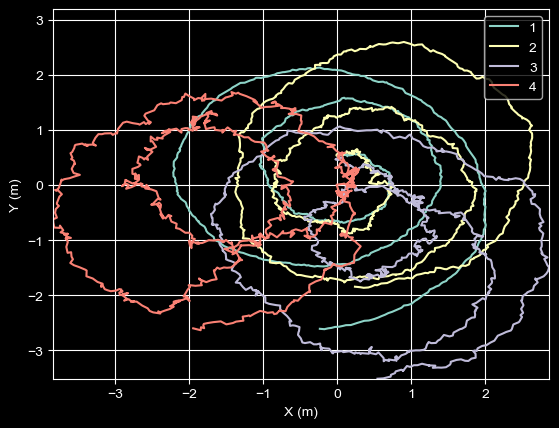

In [5]:
plot_traj(trjs, names=['1', '2', '3', '4'])

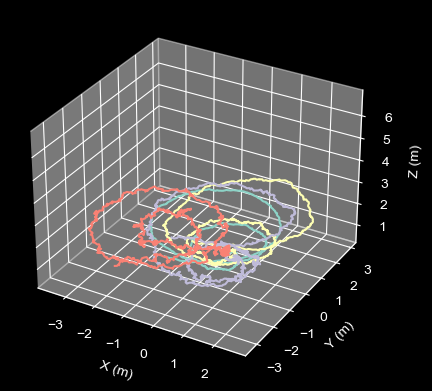

In [6]:
plot_traj(trjs, dim=3)

In [7]:
plot_traj(trjs, dim=1)

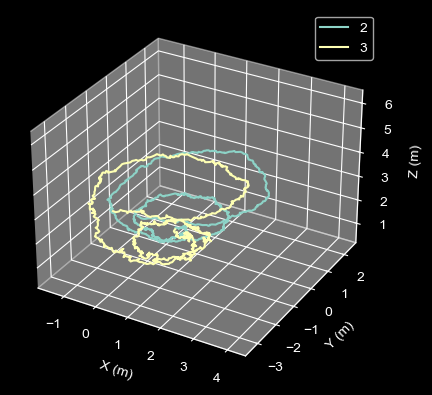

In [8]:
plot_traj(trjs[1:-1], names=['2', '3'], dim=3)

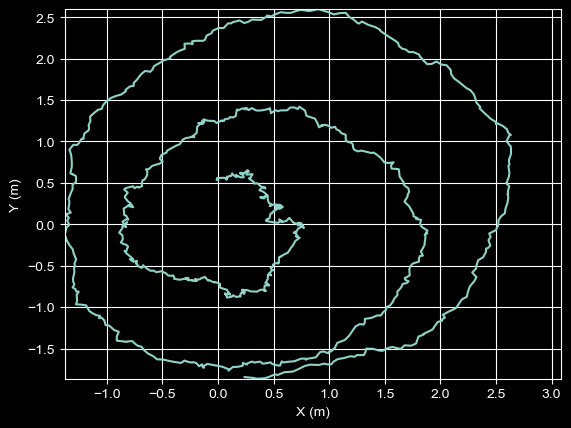

In [9]:
plot_traj([trjs[1][:, :-1]], dim=2)